In [33]:
from bookAnalyzer import BookAnalyzer

# Инициализируем объект BookAnalyzer с базой данных books.db
analyzer = BookAnalyzer('books.db', reset=False, convert_docx_to_pdf=False, convert_odt_to_pdf=False)

In [34]:
# Обрабатываем каталог 'books' с учетом файлов типа 'pdf', исключая подкаталог 'exclude_dir'
analyzer.process_directory('books', ['odt', 'docx', 'pdf', 'epub'], ['exclude_dir'], 5, convert_docx_to_pdf=True, convert_odt_to_pdf=True)
#analyzer.process_directory('books', ['odt'], ['exclude_dir'], 5, convert_docx_to_pdf=False, convert_odt_to_pdf=True)

incorrect startxref pointer(1)


In [1]:
import sqlite3
from prettytable import from_db_cursor

conn = sqlite3.connect('books.db')
cursor = conn.cursor()

# Пример запроса: получаем все книги
cursor.execute("SELECT id, title, author, file_ext, file_path, file_size, num_pages, metadata FROM books")
from_db_cursor(cursor)

id,title,author,file_ext,file_path,file_size,num_pages,metadata
1,Как прожить сто лет и изящно состариться,Джеймс Мартин Пиблз,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\98954389.a4.pdf,316952,20,"{'/Creator': 'Apache FOP Version svn-trunk', '/CreationDate': ""D:20230515224139+03'00'"", '/Producer': 'Apache FOP Version svn-trunk', '/Subject': 'home_health', '/Author': 'Джеймс Мартин Пиблз', '/Title': 'Как прожить сто лет и изящно состариться'}"
2,Harry Potter and the Philosopher's Stone,J.K. Rowling,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\Harry_Potter_eng\HP_1_-_Harry_Potter_and_the_Philosopher's_Stone.pdf,1104492,231,"{'/CreationDate': ""D:20090817225108+10'00'"", '/Subject': 'Reference Quality Electronic Book Version of the British Bloomsbury Hard Cover', '/Author': 'J.K. Rowling', '/Creator': 'PScript5.dll Version 5.2', '/Keywords': 'Rescued from the outrageous neglect of his aunt and uncle; a young boy with a great destiny proves his worth while attending Hogwarts School of Witchcraft and Wizardry.', '/Producer': 'Acrobat Distiller 7.0 (Windows)', '/ModDate': ""D:20090817225334+10'00'"", '/Title': ""Harry Potter and the Philosopher's Stone""}"
3,Harry Potter and the Chamber of Secrets,J.K. Rowling,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\Harry_Potter_eng\HP_2_-_Harry_Potter_and_the_Chamber_of_Secrets.pdf,1258811,259,"{'/CreationDate': ""D:20090813171622+10'00'"", '/Subject': 'Reference Quality Electronic Book Version of the British Bloomsbury Hard Cover', '/Author': 'J.K. Rowling', '/Creator': 'PScript5.dll Version 5.2', '/Keywords': 'When the Chamber of Secrets is opened again at the Hogwarts School of Witchcraft and Wizardry; second-year student Harry Potter finds himself in danger from a dark power that has once more been released on the school.', '/Producer': 'Acrobat Distiller 7.0 (Windows)', '/ModDate': ""D:20090813171838+10'00'"", '/Title': 'Harry Potter and the Chamber of Secrets'}"
4,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\Harry_Potter_eng\HP_3_-_Harry_Potter_and_the_Prisoner_of_Azkaban.pdf,1390647,325,"{'/CreationDate': ""D:20090812163539+10'00'"", '/Subject': 'Reference Quality Electronic Book Version of the British Bloomsbury Hard Cover', '/Author': 'J.K. Rowling', '/Creator': 'PScript5.dll Version 5.2', '/Keywords': ""During his third year at Hogwarts School for Witchcraft and Wizardry; Harry Potter must confront the devious and dangerous wizard responsible for his parents' deaths."", '/Producer': 'Acrobat Distiller 7.0 (Windows)', '/ModDate': ""D:20090812163816+10'00'"", '/Title': 'Harry Potter and the Prisoner of Azkaban'}"
5,Harry Potter and the Goblet of Fire,J.K. Rowling,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\Harry_Potter_eng\HP_4_-_Harry_Potter_and_the_Goblet_of_Fire.pdf,2187270,643,"{'/CreationDate': ""D:20090814154118+10'00'"", '/Subject': 'Reference Quality Electronic Book Version of the British Bloomsbury Hard Cover', '/Author': 'J.K. Rowling', '/Creator': 'PScript5.dll Version 5.2', '/Keywords': 'Fourteen-year-old Harry Potter joins the Weasleys at the Quidditch World Cup; then enters his fourth year at Hogwarts Academy where he is mysteriously entered in an unusual contest that challenges his wizarding skills; friendships and character; amid signs that an old enemy is growing stronger.', '/Producer': 'Acrobat Distiller 7.0 (Windows)', '/ModDate': ""D:20090814154354+10'00'"", '/Title': 'Harry Potter and the Goblet of Fire'}"
6,Harry Potter and the Order of the Phoenix,J.K. Rowling,.pdf,C:/Users/79251/Desktop/ВУЗ/4 семестр/Курсовой проект/kurs_project_4/books\Harry_Potter_eng\HP_5_-_Harry_Potter_and_the_Order_of_the_Phoenix.pdf,2892394,773,"{'/CreationDate': ""D:20090812164521+10'00'"", '/Subject': 'Reference Quality Electronic Book Version of the British Blo

In [3]:
# Закрываем соединение
conn.close()

In [4]:
analyzer.display_previews()

NameError: name 'analyzer' is not defined

In [38]:
analyzer.search_books_by_author('Мартин')

[('Как прожить сто лет и изящно состариться', 'Джеймс Мартин Пиблз', 20)]

In [39]:
analyzer.search_books_by_title('book')

[('The_Jungle_Book_level_2', None, 50)]

In [40]:
analyzer.search_books_by_extension('.odt')

[('Война и мир', 'Владимир Владимирович Маяковский', '.odt'),
 ('Про это', 'Владимир Маяковский', '.odt')]

In [41]:
analyzer.get_largest_books(limit=5, offset=0)

[('preview_681541', None, '3.0 МБ'),
 ('Harry Potter and the Order of the Phoenix', 'J.K. Rowling', '2.8 МБ'),
 ('Harry Potter and the Deathly Hallows', 'J.K. Rowling', '2.2 МБ'),
 ('Harry Potter and the Goblet of Fire', 'J.K. Rowling', '2.1 МБ'),
 ('Harry Potter and the Half-Blood Prince', 'J.K. Rowling', '1.9 МБ')]

In [42]:
analyzer.get_books_with_most_pages(limit=5, offset=0)

[('Harry Potter and the Order of the Phoenix', 'J.K. Rowling', 773),
 ('Harry Potter and the Goblet of Fire', 'J.K. Rowling', 643),
 ('Harry Potter and the Half-Blood Prince', 'J.K. Rowling', 615),
 ('Harry Potter and the Deathly Hallows', 'J.K. Rowling', 615),
 ('Harry Potter and the Prisoner of Azkaban', 'J.K. Rowling', 325)]

In [43]:
analyzer.get_recently_added_books(limit=5, offset=0)

[('The_Jungle_Book_level_2', None),
 ('Наполеон. Годы изгнания', 'Маршан Луи-Жозеф'),
 ('Harry Potter and the Deathly Hallows', 'J.K. Rowling'),
 ('Harry Potter and the Half-Blood Prince', 'J.K. Rowling'),
 ('Harry Potter and the Order of the Phoenix', 'J.K. Rowling')]

In [44]:
analyzer.get_books_without_author()

[('preview_681541', 20), ('The_Jungle_Book_level_2', 50)]

In [45]:
analyzer.get_books_without_metadata()

[('preview_681541', '.pdf', '3.0 МБ')]

In [46]:
analyzer.get_file_extension_statistics()

[('.docx', 2), ('.epub', 4), ('.odt', 2), ('.pdf', 10)]

In [47]:
analyzer.search_books_by_metadata("Apache")

[('Как прожить сто лет и изящно состариться',
  'Джеймс Мартин Пиблз',
  '{\'/Creator\': \'Apache FOP Version svn-trunk\', \'/CreationDate\': "D:20230515224139+03\'00\'", \'/Producer\': \'Apache FOP Version svn-trunk\', \'/Subject\': \'home_health\', \'/Author\': \'Джеймс Мартин Пиблз\', \'/Title\': \'Как прожить сто лет и изящно состариться\'}')]

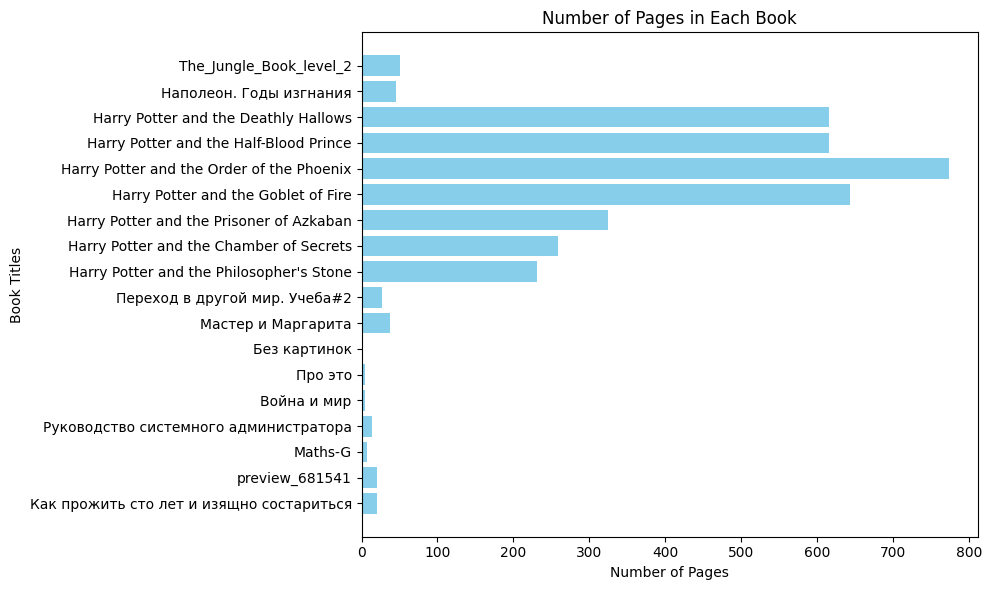

In [48]:
analyzer.plot_books_pages()